<a href="https://colab.research.google.com/github/Atruk/UAI_HW/blob/master/HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт модулей

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import pylab
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import drive
from keras.callbacks import History
from pprint import pprint

%matplotlib inline

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# Вариант 1

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_4 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
375/375 [==============================] - 1s 3ms/step - loss: 0.2280 - accuracy: 0.9327 - val_loss: 0.1159 - val_accuracy: 0.9640
Epoch 2/15
375/375 [==============================] - 1s 3ms/step - loss: 0.0852 - accuracy: 0.9734 - val_loss: 0.0916 - val_accuracy: 0.9716
Epoch 3/15
375/375 [==============================] - 1s 3ms/step - loss: 0.0509 - accura

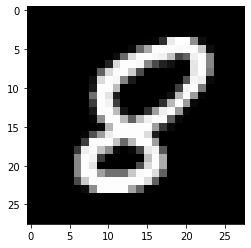

Распознавание выбранного примера:  [[4.9275456e-10 1.7440417e-11 2.5587092e-06 6.5503657e-13 1.7011206e-12
  7.3196423e-12 2.4837121e-09 2.8305431e-13 9.9999750e-01 4.4535033e-09]]
Вывод результата (10 цифр):  8
Индекс самого большого элемента (Итоговая цифра):  0
Правильный ответ:  8


In [ ]:
def predict_hand_number_simple(n_rec):
  # Загрузка данных MNIST
  (x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

  #print(x_train_org[0])

  # n = 89 # номер изображения
  # plt.imshow(Image.fromarray(x_train_org[n]).convert('RGBA'))
  # plt.show()

  # Изменение формата входных изображений с 28х28 на 784х1
  x_train = x_train_org.reshape(60000, 784)
  x_test = x_test_org.reshape(10000, 784)
  #print(x_train_org.shape)
  # print(x_train.shape)
  # print(x_test_org.shape)
  # print(x_test.shape)

  # Нормализация входных изображений
  x_train = x_train.astype('float32')
  x_train = x_train / 255
  x_test = x_test.astype('float32')
  x_test = x_test / 255

  # print(y_train_org[0])
  # print(utils.to_categorical(y_train_org[0], 10))

  # Преобразование ответов в формат one_hot_encoding
  y_train = utils.to_categorical(y_train_org, 10)
  y_test = utils.to_categorical(y_test_org, 10)

  # print(y_train.shape)
  # print(y_test.shape)
  # #print(y_train[n])
  # #print(y_test[n])
  # print(y_train_org.shape)
  # print(y_test_org.shape)
  # print(y_train_org[16])
  # print(y_train_org[5])

  # Создание НС
  model = Sequential()
  model.add(Dense(800, input_dim=784, activation='relu'))
  model.add(Dense(400, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  print(model.summary())

  # Обучение НС
  model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1, validation_split=0.2)

  model.save_weights('model.h5')
  model.load_weights('model.h5')

  # Распознование рукописных цифр
  #n_rec = 5245 # номер тестовой цифры, которую нужно распознать
  plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA')) # Отрисовка нужной цифры
  plt.show()

  x = x_test[n_rec] # Отбор нужного изображения из тестовой выборки
  #print(x.shape)

  x = np.expand_dims(x, axis=0)
  #print(x.shape)

  prediction = model.predict(x) # Распознавание выбранного примера
  print('Распознавание выбранного примера: ', prediction)

  prediction = np.argmax(prediction) # Вывод результата (10 цифр)
  print('Вывод результата (10 цифр): ', prediction)

  prediction = np.argmax(prediction) # Индекс самого большого элемента - итоговая цифра, которую распознала сеть
  print('Индекс самого большого элемента (Итоговая цифра): ', prediction)

  print('Правильный ответ: ', y_test_org[n_rec]) # Правильный ответ




n_rec = 8223
predict_hand_number_simple(n_rec)

# Вариант 2

In [ ]:
def predict_hand_number(n_rec, hidden_size_f, hidden_size_s, activation, batch_size):
  # Загрузка данных MNIST
  (x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

  # Изменение формата входных изображений с 28х28 на 784х1
  x_train = x_train_org.reshape(60000, 784)
  x_test = x_test_org.reshape(10000, 784)

  # Нормализация входных изображений
  x_train = x_train.astype('float32')
  x_train = x_train / 255
  x_test = x_test.astype('float32')
  x_test = x_test / 255

  # Преобразование ответов в формат one_hot_encoding
  y_train = utils.to_categorical(y_train_org, 10)
  y_test = utils.to_categorical(y_test_org, 10)

  history = History()

  # Создание НС
  model = Sequential()
  model.add(Dense(hidden_size_f, input_dim=784, activation=activation))
  model.add(Dense(hidden_size_s, activation=activation))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  print(model.summary())

  # Обучение НС
  history = model.fit(x_train, y_train, batch_size=batch_size, epochs=15, verbose=1, validation_split=0.2)
  print(history.history.keys())
  #pprint(history.history)
  df = pd.DataFrame(history.history)
  pprint(df)

  model.save_weights('model.h5')
  model.load_weights('model.h5')

  # Обучение и проверка точности значений
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Точность модели')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # Распознавание рукописных цифр
  #n_rec = 5245 # номер тестовой цифры, которую нужно распознать
  plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA')) # Отрисовка нужной цифры
  plt.show()

  x = x_test[n_rec] # Отбор нужного изображения из тестовой выборки
  #print(x.shape)

  x = np.expand_dims(x, axis=0)
  #print(x.shape)

  prediction = model.predict(x) # Распознавание выбранного примера
  print('Распознавание выбранного примера: ', prediction)

  prediction = np.argmax(prediction) # Вывод результата (10 цифр)
  print('Вывод результата (10 цифр): ', prediction)

  prediction = np.argmax(prediction) # Индекс самого большого элемента - итоговая цифра, которую распознала сеть
  print('Индекс самого большого элемента (Итоговая цифра): ', prediction)

  print('Правильный ответ: ', y_test_org[n_rec]) # Правильный ответ

  return df

In [ ]:
hidden_size_f = [800, 10, 100, 5000]
hidden_size_s = [400, 5, 50, 2500]
activation = ['relu', 'linear']
batch_size = [128, 1, 10, 100, 60000]

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_70 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_71 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
375/375 [==============================] - 1s 3ms/step - loss: 0.2277 - accuracy: 0.9323 - val_loss: 0.1310 - val_accuracy: 0.9612
Epoch 2/15
375/375 [==============================] - 1s 3ms/step - loss: 0.0816 - accuracy: 0.9756 - val_loss: 0.1010 - val_accuracy: 0.9684
Epoch 3/15
375/375 [==============================] - 1s 3ms/step - loss: 0.0507 - accur

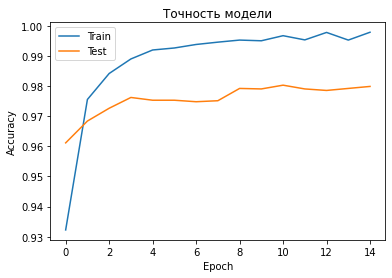

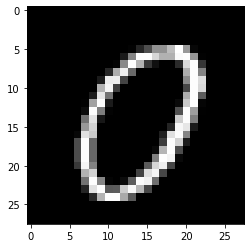

Распознавание выбранного примера:  [[9.8529643e-01 3.6598542e-09 1.4693521e-02 3.3627236e-11 1.7032999e-08
  9.0943713e-13 1.6194546e-08 7.2763169e-07 5.5326372e-11 9.3353656e-06]]
Вывод результата (10 цифр):  0
Индекс самого большого элемента (Итоговая цифра):  0
Правильный ответ:  0


In [ ]:
df1 = predict_hand_number(545, hidden_size_f[0], hidden_size_s[0], activation[0], batch_size[0])
df1_m = df1['val_accuracy'].mean()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_73 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_74 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
375/375 [==============================] - 1s 3ms/step - loss: 0.2312 - accuracy: 0.9296 - val_loss: 0.1070 - val_accuracy: 0.9678
Epoch 2/15
375/375 [==============================] - 1s 3ms/step - loss: 0.0832 - accuracy: 0.9740 - val_loss: 0.0867 - val_accuracy: 0.9728
Epoch 3/15
375/375 [==============================] - 1s 3ms/step - loss: 0.0516 - accur

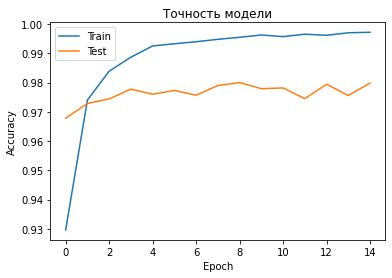

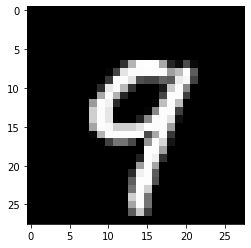

Распознавание выбранного примера:  [[1.9980897e-16 4.9165828e-14 2.0499921e-12 3.2065989e-11 1.1991188e-08
  6.8532097e-11 1.2163024e-16 1.7784299e-12 1.3785703e-11 1.0000000e+00]]
Вывод результата (10 цифр):  9
Индекс самого большого элемента (Итоговая цифра):  0
Правильный ответ:  9


In [ ]:
df2 = predict_hand_number(12, hidden_size_f[0], hidden_size_s[0], activation[0], batch_size[0])
df2_m = df2['val_accuracy'].mean()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_85 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_86 (Dense)             (None, 10)                60        
Total params: 7,965
Trainable params: 7,965
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
375/375 [==============================] - 1s 3ms/step - loss: 1.6259 - accuracy: 0.4320 - val_loss: 1.0162 - val_accuracy: 0.6998
Epoch 2/15
375/375 [==============================] - 1s 3ms/step - loss: 0.6866 - accuracy: 0.8066 - val_loss: 0.4726 - val_accuracy: 0.8721
Epoch 3/15
375/375 [==============================] - 1s 3ms/step - loss: 0.4420 - accuracy:

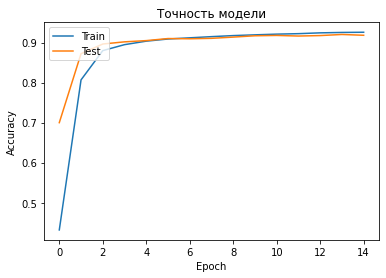

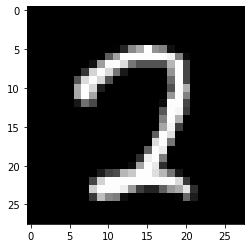

Распознавание выбранного примера:  [[5.4149938e-01 1.3136646e-08 1.6757591e-01 2.2602803e-01 5.9138060e-06
  1.6054794e-02 5.1467705e-05 8.8891685e-03 2.9044846e-02 1.0850452e-02]]
Вывод результата (10 цифр):  0
Индекс самого большого элемента (Итоговая цифра):  0
Правильный ответ:  2


In [ ]:
df3 = predict_hand_number(1256, hidden_size_f[1], hidden_size_s[1], activation[0], batch_size[0])
df3_m = df3['val_accuracy'].mean()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_88 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_89 (Dense)             (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
375/375 [==============================] - 1s 3ms/step - loss: 0.3878 - accuracy: 0.8910 - val_loss: 0.1946 - val_accuracy: 0.9453
Epoch 2/15
375/375 [==============================] - 1s 3ms/step - loss: 0.1601 - accuracy: 0.9526 - val_loss: 0.1631 - val_accuracy: 0.9538
Epoch 3/15
375/375 [==============================] - 1s 3ms/step - loss: 0.1150 - accurac

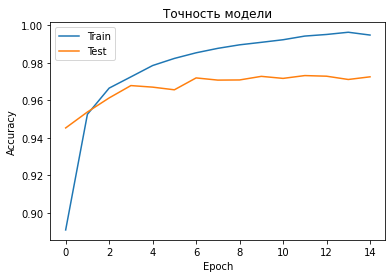

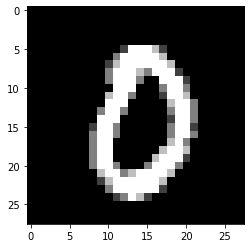

Распознавание выбранного примера:  [[9.9999988e-01 1.2010115e-12 5.8898504e-09 3.4181000e-13 1.4750491e-14
  1.8368818e-09 6.4937313e-09 5.9266432e-13 5.0668445e-12 1.6865761e-07]]
Вывод результата (10 цифр):  0
Индекс самого большого элемента (Итоговая цифра):  0
Правильный ответ:  0


In [ ]:
df4 = predict_hand_number(5435, hidden_size_f[2], hidden_size_s[2], activation[0], batch_size[0])
df4_m = df4['val_accuracy'].mean()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 5000)              3925000   
_________________________________________________________________
dense_82 (Dense)             (None, 2500)              12502500  
_________________________________________________________________
dense_83 (Dense)             (None, 10)                25010     
Total params: 16,452,510
Trainable params: 16,452,510
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
375/375 [==============================] - 3s 8ms/step - loss: 0.2069 - accuracy: 0.9361 - val_loss: 0.1134 - val_accuracy: 0.9664
Epoch 2/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0780 - accuracy: 0.9754 - val_loss: 0.1021 - val_accuracy: 0.9686
Epoch 3/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0528 -

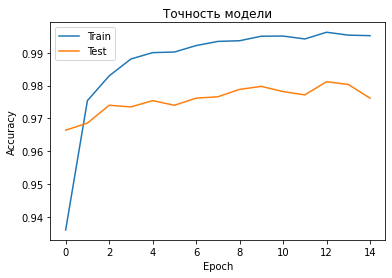

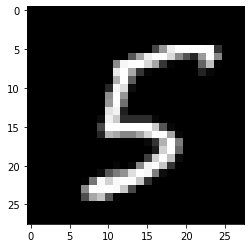

Распознавание выбранного примера:  [[6.4038379e-26 4.5488466e-22 1.2188695e-26 2.3972091e-16 2.3108812e-27
  1.0000000e+00 1.3437758e-21 2.6127954e-26 1.1352286e-24 9.2019251e-17]]
Вывод результата (10 цифр):  5
Индекс самого большого элемента (Итоговая цифра):  0
Правильный ответ:  5


In [ ]:
df5 = predict_hand_number(23, hidden_size_f[3], hidden_size_s[3], activation[0], batch_size[0])
df5_m = df5['val_accuracy'].mean()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_91 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_92 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
48000/48000 [==============================] - 105s 2ms/step - loss: 0.2955 - accuracy: 0.9222 - val_loss: 0.1758 - val_accuracy: 0.9550
Epoch 2/15
48000/48000 [==============================] - 105s 2ms/step - loss: 0.2060 - accuracy: 0.9544 - val_loss: 0.2208 - val_accuracy: 0.9507
Epoch 3/15
48000/48000 [==============================] - 106s 2ms/step - lo

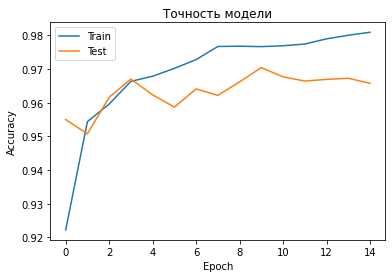

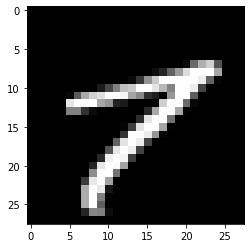

Распознавание выбранного примера:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Вывод результата (10 цифр):  7
Индекс самого большого элемента (Итоговая цифра):  0
Правильный ответ:  7


In [ ]:
df6 = predict_hand_number(1241, hidden_size_f[0], hidden_size_s[0], activation[0], batch_size[1])
df6_m = df6['val_accuracy'].mean()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_94 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_95 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
480/480 [==============================] - 2s 4ms/step - loss: 0.2193 - accuracy: 0.9350 - val_loss: 0.1108 - val_accuracy: 0.9665
Epoch 2/15
480/480 [==============================] - 1s 3ms/step - loss: 0.0801 - accuracy: 0.9757 - val_loss: 0.0804 - val_accuracy: 0.9737
Epoch 3/15
480/480 [==============================] - 1s 3ms/step - loss: 0.0518 - accur

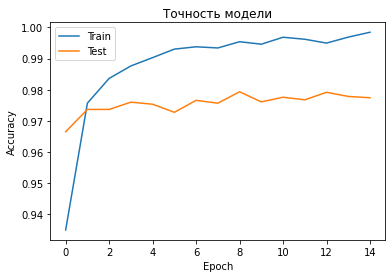

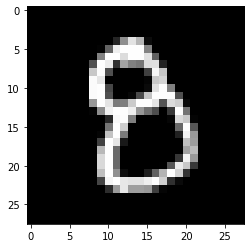

Распознавание выбранного примера:  [[4.39522090e-08 5.08862527e-12 5.36574651e-09 1.79238735e-09
  5.40062515e-13 1.29092035e-08 1.28011905e-07 1.22419999e-11
  9.99999762e-01 4.55299043e-09]]
Вывод результата (10 цифр):  8
Индекс самого большого элемента (Итоговая цифра):  0
Правильный ответ:  8


In [ ]:
df7 = predict_hand_number(1562, hidden_size_f[0], hidden_size_s[0], activation[0], batch_size[3])
df7_m = df7['val_accuracy'].mean()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_97 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_98 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
4800/4800 [==============================] - 11s 2ms/step - loss: 0.2032 - accuracy: 0.9394 - val_loss: 0.1173 - val_accuracy: 0.9638
Epoch 2/15
4800/4800 [==============================] - 11s 2ms/step - loss: 0.0984 - accuracy: 0.9700 - val_loss: 0.1624 - val_accuracy: 0.9561
Epoch 3/15
4800/4800 [==============================] - 11s 2ms/step - loss: 0.073

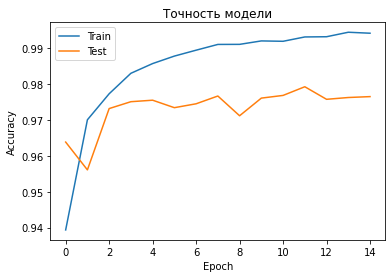

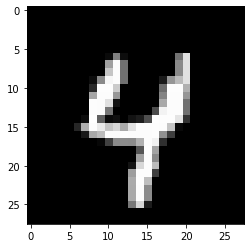

Распознавание выбранного примера:  [[0.0000000e+00 1.2847616e-28 6.3556720e-27 1.9888305e-28 1.0000000e+00
  2.0749719e-27 2.4934866e-28 6.1359003e-35 1.3289162e-28 1.8250312e-22]]
Вывод результата (10 цифр):  4
Индекс самого большого элемента (Итоговая цифра):  0
Правильный ответ:  4


In [ ]:
df8 = predict_hand_number(1111, hidden_size_f[0], hidden_size_s[0], activation[0], batch_size[2])
df8_m = df8['val_accuracy'].mean()

In [ ]:

df_sum = pd.DataFrame({'n_rec':[545, 12, 1256, 5435, 23, 1241, 1562, 1111],
                       'hidden_size_f':[800, 800, 10, 100, 5000, 800, 800, 800],
                       'hidden_size_s':[400, 400, 5, 50, 2500, 400, 400, 400],
                       'activation':['relu', 'linear', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu'],
                       'batch_size':[128, 128, 128, 128, 128, 1, 60000, 10],
                       'val_accuracy_mean':[df1_m, df2_m, df3_m, df4_m, df5_m, df6_m, df7_m, df8_m]})
df_sum

,n_rec,hidden_size_f,hidden_size_s,activation,batch_size,val_accuracy_mean
0,545,800,400,relu,128,0.975644
1,12,800,400,linear,128,0.976417
2,1256,10,5,relu,128,0.894928
3,5435,100,50,relu,128,0.967294
4,23,5000,2500,relu,128,0.975750
5,1241,800,400,relu,1,0.963478
6,1562,800,400,relu,60000,0.975622
7,1111,800,400,relu,10,0.973339


При изменении функции активации с 'relu' на 'linear' - точность практически не меняется (почти одинакова).
Уменьшение количества нейронов уменьшает точность, при увеличении количества нейронов точность не меняется. В некоторых случаях предсказывает число неверно.
При малом количестве batch_size - время обучения сильно возрастает. Точность слегка уменьшается или не изменяется. При размере batch_size=60000 (вся база) - точность не изменилась, с ранее начальными установленными базовыми значениями. Скорость обучения нормальная

# Pro задание

In [ ]:
# Загрузка данных MNIST
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

In [ ]:
# Изменение формата входных изображений с 28х28 на 784х1
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

In [ ]:
# Нормализация входных изображений
x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test.astype('float32')
x_test = x_test / 255

In [ ]:
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [ ]:
history = History()

In [ ]:
# Создание НС
model_img = Sequential()
model_img.add(Dense(800, input_dim=784, activation='relu'))
model_img.add(Dense(400, activation='relu'))
model_img.add(Dense(10, activation='softmax'))
model_img.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_img.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Обучение НС
history = model_img.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1, validation_split=0.5)
print(history.history.keys())

Epoch 1/15
235/235 [==============================] - 1s 6ms/step - loss: 0.2816 - accuracy: 0.9178 - val_loss: 0.1460 - val_accuracy: 0.9566
Epoch 2/15
235/235 [==============================] - 1s 5ms/step - loss: 0.1001 - accuracy: 0.9689 - val_loss: 0.1154 - val_accuracy: 0.9651
Epoch 3/15
235/235 [==============================] - 1s 5ms/step - loss: 0.0579 - accuracy: 0.9819 - val_loss: 0.1066 - val_accuracy: 0.9674
Epoch 4/15
235/235 [==============================] - 1s 5ms/step - loss: 0.0375 - accuracy: 0.9882 - val_loss: 0.1119 - val_accuracy: 0.9683
Epoch 5/15
235/235 [==============================] - 1s 5ms/step - loss: 0.0233 - accuracy: 0.9928 - val_loss: 0.1096 - val_accuracy: 0.9697
Epoch 6/15
235/235 [==============================] - 1s 5ms/step - loss: 0.0205 - accuracy: 0.9931 - val_loss: 0.1298 - val_accuracy: 0.9685
Epoch 7/15
235/235 [==============================] - 1s 5ms/step - loss: 0.0149 - accuracy: 0.9955 - val_loss: 0.1230 - val_accuracy: 0.9715
Epoch 

In [ ]:
#pprint(history.history)
df = pd.DataFrame(history.history)
pprint(df)

        loss  accuracy  val_loss  val_accuracy
0   0.281602  0.917833  0.145961      0.956633
1   0.100101  0.968867  0.115389      0.965133
2   0.057900  0.981867  0.106575      0.967400
3   0.037455  0.988233  0.111857      0.968267
4   0.023288  0.992767  0.109615      0.969700
5   0.020501  0.993100  0.129849      0.968533
6   0.014899  0.995500  0.123015      0.971467
7   0.015398  0.994700  0.125509      0.970100
8   0.011519  0.996267  0.139611      0.968533
9   0.016998  0.994500  0.163181      0.965267
10  0.014408  0.995400  0.117871      0.974200
11  0.008549  0.997533  0.136630      0.972767
12  0.007205  0.997733  0.132932      0.973567
13  0.003975  0.998767  0.138462      0.973133
14  0.013245  0.995767  0.146106      0.971967


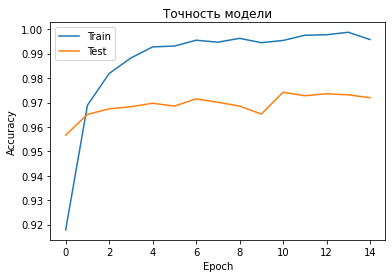

In [ ]:
  # Обучение и проверка точности значений
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Точность модели')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [ ]:
model_img.save_weights('model_pro.h5')
model_img.load_weights('model_pro.h5')

In [ ]:
# img = image.load_img('/content/1.png', target_size=(28, 28), color_mode='grayscale')
# plt.imshow(img.convert('RGBA'))

In [ ]:
# img = image.load_img('/content/2.png', target_size=(28, 28), color_mode='grayscale')
# plt.imshow(img.convert('RGBA'))

In [ ]:
# img = image.load_img('/content/3.png', target_size=(28, 28), color_mode='grayscale')
# plt.imshow(img.convert('RGBA'))

In [ ]:
# img = image.load_img('/content/4.png', target_size=(28, 28), color_mode='grayscale')
# plt.imshow(img.convert('RGBA'))

In [ ]:
# img = image.load_img('/content/5.png', target_size=(28, 28), color_mode='grayscale')
# plt.imshow(img.convert('RGBA'))

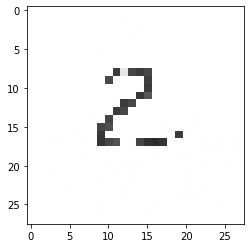

In [ ]:
img = image.load_img('/content/Scan_2.jpg', target_size=(28, 28), color_mode='grayscale')
plt.imshow(img.convert('RGBA'))

In [ ]:
# img = image.load_img('/content/6.png', target_size=(28, 28), color_mode='grayscale')
# plt.imshow(img.convert('RGBA'))

In [ ]:
# img = image.load_img('/content/7.png', target_size=(28, 28), color_mode='grayscale')
# plt.imshow(img.convert('RGBA'))

In [ ]:
# img = image.load_img('/content/8.png', target_size=(28, 28), color_mode='grayscale')
# plt.imshow(img.convert('RGBA'))

In [ ]:
# img = image.load_img('/content/9.png', target_size=(28, 28), color_mode='grayscale')
# plt.imshow(img.convert('RGBA'))

In [ ]:
# преобразование изображения в массив
img_arr = image.img_to_array(img)
# Изменение формы массива в плоский вектор
img_arr = img_arr.reshape(1, 784)
# Инверсия изображения
img_arr = 255 - img_arr
# Нормализация изображения
img_arr /= 255

In [ ]:
# Распознавание
prediction_img = model_img.predict(img_arr)
print(prediction_img)
print('Распознанная цифра: ', np.argmax(prediction_img))

[[1.1986908e-01 2.0961773e-02 4.3985391e-01 1.8003916e-04 2.9929316e-01
  1.1226124e-03 2.4055124e-04 1.1792778e-01 1.2616995e-05 5.3846888e-04]]
Распознанная цифра:  2
